In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from xgboost import XGBClassifier
import joblib
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
data = pd.read_csv('/content/Dataset--Heart-Disease-Prediction-using-ANN.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.isnull().any()

,0
age,False
sex,False
cp,False
trestbps,False
chol,False
fbs,False
restecg,False
thalach,False
exang,False
oldpeak,False


In [ ]:
X = data.iloc[:,:13].values
y = data["target"].values

In [ ]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3 , random_state = 0 )

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

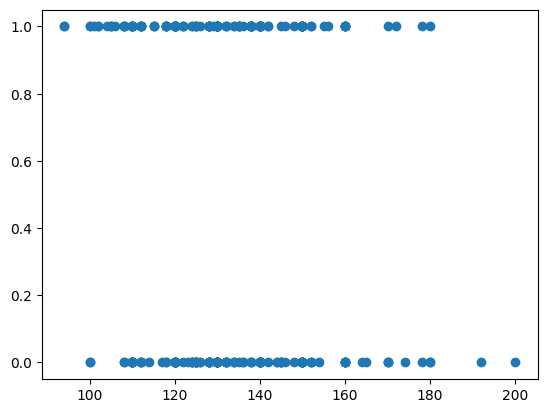

In [ ]:
plt.scatter(X[:,3],y)

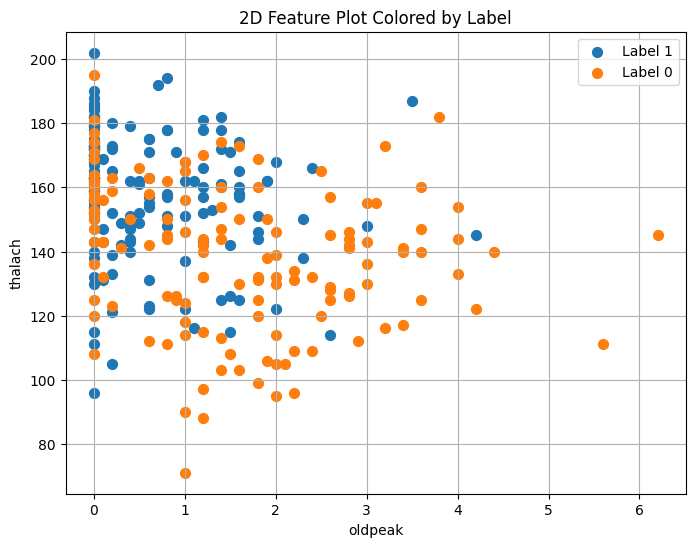

In [ ]:
import matplotlib.pyplot as plt

# Example: choose two features and the label
x_feature = 'oldpeak'   # replace with your actual column name or index
y_feature = 'thalach'
label_col = 'target'

# Create scatter plot
plt.figure(figsize=(8, 6))

for lbl in data[label_col].unique():
    subset = data[data[label_col] == lbl]
    plt.scatter(subset[x_feature], subset[y_feature], label=f'Label {lbl}', s=50)

# Add plot labels
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title('2D Feature Plot Colored by Label')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
classifier = Sequential()
classifier.add(Dense(activation = "relu", input_dim = 13,
                     units = 8, kernel_initializer = "uniform"))
classifier.add(Dense(activation = "sigmoid", units = 1,
                     kernel_initializer = "uniform"))
#classifier.add(Dense(activation = "sigmoid", units = 1,
                     #kernel_initializer = "uniform"))
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy',
                   metrics = ['accuracy'] )

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
classifier.fit(X_train , y_train , batch_size = 8 ,epochs = 100  )
y_pred_ann = classifier.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)
cman = confusion_matrix(y_test,y_pred_ann)
accuracy = (cman[0][0]+cman[1][1])/(cman[0][1] + cman[1][0] +cman[0][0] +cman[1][1])
print(accuracy*100)


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6738 - loss: 0.6919 
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7900 - loss: 0.6861  
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8466 - loss: 0.6719 
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8228 - loss: 0.6424 
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8458 - loss: 0.6061
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8639 - loss: 0.5635
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9027 - loss: 0.4958
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8789 - loss: 0.4717
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8688 - loss: 0.4343
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8499 - loss: 0.4513
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8889 - loss: 0.3741
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accu

In [ ]:
y_pred_ann = classifier.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)
cman = confusion_matrix(y_test,y_pred_ann)
accuracy = (cman[0][0]+cman[1][1])/(cman[0][1] + cman[1][0] +cman[0][0] +cman[1][1])
print(accuracy*100)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [ ]:
#clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf = XGBClassifier(
    max_depth=3,
    n_estimators=100,
    learning_rate=0.1,
    objective='multi:softmax',  # multi-class classification
    num_class=len(np.unique(y)),
    random_state=42
)
clf.fit(X_train, y_train)
#clf.fit(X_train, y_train)
print(f"Training Accuracy: {clf.score(X_train, y_train):.2f}")
print(f"Testing Accuracy:  {clf.score(X_test, y_test):.2f}")
y_pred_dt = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred_dt)
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print(accuracy*100)

Training Accuracy: 1.00
Testing Accuracy:  0.80
80.21978021978022


In [ ]:

clf_cv = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    objective='multi:softmax',  # multi-class classification
    num_class=len(np.unique(y)),
    random_state=42
)
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 4, 6, 12],
    'min_samples_split': [3, 4, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=clf_cv, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("✅ Best parameters found:", grid_search.best_params_)

y_pred = best_model.predict(X_test)
print("\n🎯 Test Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression

clfr = LogisticRegression(max_iter=100)
clfr.fit(X_train, y_train)
#clf.fit(X_train, y_train)
print(f"Training Accuracy: {clfr.score(X_train, y_train):.2f}")
print(f"Testing Accuracy:  {clfr.score(X_test, y_test):.2f}")
y_pred_dt = clfr.predict(X_test)
cm = confusion_matrix(y_test,y_pred_dt)
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print(accuracy*100)

Training Accuracy: 0.86
Testing Accuracy:  0.81
81.31868131868131


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

X = data.iloc[:,:13].values
y = data["target"].values
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3 , random_state = 0 )
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

print(y_train)
# Define a simple feedforward neural network
class Classifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Classifier, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.layers(x)

# Model configuration
input_dim = X_train.shape[1]
hidden_dim = 16
output_dim = len(data['target'].unique());
learning_rate = 0.1  # ✅ specify learning rate
print(output_dim)
# Initialize model, loss, and optimizer
model = Classifier(input_dim, hidden_dim, output_dim);
print(model)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # ✅ specify optimizer

# Training loop
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()        # reset gradients
    outputs = model(X_train)
    loss = criterion(outputs, y_train)  # compute loss
    print(outputs.size())
    loss.backward()              # backpropagation
    optimizer.step()             # update weights

    #if (epoch + 1) % 10 == 0:
        #print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Evaluate on test data
#with torch.no_grad():
    #y_pred = model(X_test)
    #y_pred_classes = torch.argmax(y_pred, dim=1)
    #acc = confusion_matrix(y_test, y_pred_classes)
#cm = confusion_matrix(y_test,y_pred_classes)
#accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
#print(accuracy*100)
#print(f"\nTest Accuracy: {accuracy:.4f}")

tensor([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])
2
Classifier(
  (layers): Sequential(
    (0): Linear(in_features=13, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=2, bias=True)
  )
)
torch.Size([212, 2])
torch.Size([212, 2])
torch.Size([212, 2])
torch.Size([212, 2])
torch.Size([212, 2])
torch.S

In [ ]:
joblib.dump(model, 'model.pkl')

In [2]:
!git config --global user.email "arkapravapal88@gmail.com"
!git config --global user.name "arkalb1"